<a href="https://colab.research.google.com/github/bagasap10/COMP6577-MachineLearning/blob/main/MLLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://github.com/andrychowanda/COMP6577/blob/master/listings.csv

In [ ]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

cT = pd.read_csv("/content/listings.csv")

print(cT.head())

      id  ... availability_365
0  49091  ...              365
1  50646  ...              365
2  56334  ...              365
3  71609  ...              353
4  71896  ...              355

[5 rows x 16 columns]


# **Data Visualization**

In [ ]:
cT.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7.907000e+03,7.907000e+03,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,5149.000000,7907.000000,7907.000000
mean,2.338862e+07,9.114481e+07,1.314192,103.848787,169.332996,17.510054,12.807386,1.043669,40.607689,208.726318
std,1.016416e+07,8.190910e+07,0.030577,0.043675,340.187599,42.094616,29.707746,1.285851,65.135253,146.120034
min,4.909100e+04,2.366600e+04,1.243870,103.646560,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.582180e+07,2.305808e+07,1.295795,103.835825,65.000000,1.000000,0.000000,0.180000,2.000000,54.000000
50%,2.470627e+07,6.344891e+07,1.311030,103.849410,124.000000,3.000000,2.000000,0.550000,9.000000,260.000000
75%,3.234850e+07,1.553811e+08,1.322110,103.872535,199.000000,10.000000,10.000000,1.370000,48.000000,355.000000
max,3.811276e+07,2.885676e+08,1.454590,103.973420,10000.000000,1000.000000,323.000000,13.000000,274.000000,365.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


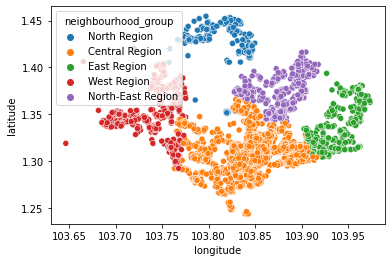

In [ ]:
sns.scatterplot(cT.longitude, cT.latitude, hue = cT.neighbourhood_group)

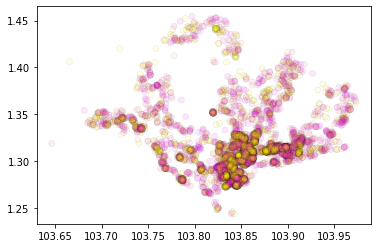

In [ ]:
import matplotlib 
import matplotlib.pyplot as plt
plt.scatter(cT.longitude, cT.latitude, c=cT.availability_365, cmap='spring', edgecolor='black', linewidth=0.5\
            , alpha=0.1)

In [ ]:
cT1=cT.sort_values(by=['number_of_reviews'],ascending=False).head(1000)
cT1.head()

import folium
from folium.plugins import MarkerCluster
from folium import plugins
print('Rooms with the most number of reviews')
Long=103.91492
Lat=1.32122
mapcT1=folium.Map([Lat,Long],zoom_start=10,)

mapcT1_rooms_map=plugins.MarkerCluster().add_to(mapcT1)

for lat,lon,label in zip(cT1.latitude,cT1.longitude,cT1.name):
    folium.Marker(location=[lat,lon],icon=folium.Icon(icon='home'),popup=label).add_to(mapcT1_rooms_map)
mapcT1.add_child(mapcT1_rooms_map)

mapcT1

Rooms with the most number of reviews


# **Linear Regression**

Import required packages

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from math import sqrt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

Import data

In [ ]:
!wget https://raw.githubusercontent.com/andrychowanda/COMP6577/master/listings.csv

In [ ]:
listingData = pd.read_csv('listings.csv')
listingData

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7902,38105126,Loft 2 pax near Haw Par / Pasir Panjang. Free ...,278109833,Belle,Central Region,Queenstown,1.27973,103.78751,Entire home/apt,100,3,0,NaN,NaN,31,61
7903,38108273,3bedroom luxury at Orchard,238891646,Neha,Central Region,Tanglin,1.29269,103.82623,Entire home/apt,550,6,0,NaN,NaN,34,365
7904,38109336,[ Farrer Park ] New City Fringe CBD Mins to MRT,281448565,Mindy,Central Region,Kallang,1.31286,103.85996,Private room,58,30,0,NaN,NaN,3,173
7905,38110493,Cheap Master Room in Central of Singapore,243835202,Huang,Central Region,River Valley,1.29543,103.83801,Private room,56,14,0,NaN,NaN,2,30


In [ ]:
listingData.drop(['name','id','host_name'], axis=1, inplace=True)

Convert to numeric

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(listingData['neighbourhood_group'])
listingData['neighbourhood_group'] = le.transform(listingData['neighbourhood_group'])

le = preprocessing.LabelEncoder()
le.fit(listingData['neighbourhood'])
listingData['neighbourhood'] = le.transform(listingData['neighbourhood'])

le = preprocessing.LabelEncoder()
le.fit(listingData['room_type'])
listingData['room_type'] = le.transform(listingData['room_type'])

listingData.sort_values(by='price', inplace=True, ascending=True)
listingData.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3168,114674497,0,29,1.30954,103.85271,0,0,3,9,2019-08-11,0.51,6,351
7249,75175440,4,5,1.38400,103.76309,0,14,1,1,2019-06-24,0.45,2,0
2557,21900076,1,1,1.33698,103.93293,2,14,1,0,NaN,NaN,2,0
2567,108408404,0,19,1.30823,103.89461,1,14,2,1,2017-05-14,0.04,1,0
7674,29799617,0,11,1.31455,103.88323,0,14,3,4,2019-08-26,4.00,1,34


Training

In [ ]:
linreg = LinearRegression()

x = listingData[['host_id','neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']]
y = listingData['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predictions

In [25]:
predicts = linreg.predict(x_test)
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predicts.flatten()})
error_airbnb.head()

,Actual Values,Predicted Values
0,285,184.931261
1,64,1.141108
2,149,258.596612
3,131,242.201173
4,168,190.301120


Mean Absolute Error

In [26]:
mae = mean_absolute_error(y_test, predicts)
mae

83.32589543593497

Mean Squared Error

In [33]:
mse = sqrt(mean_squared_error(y_test, predicts))
mse

145.40754598578886